In [35]:
#< 가설(1) 외국인 거주자가 많은 지역이면 범죄율이 높지 않을까?


import pandas as pd

# 1. 국내에서 발생한 외국인 범죄 통계 자료
FILE1 = '외국인+범죄현황_20230106085924.csv'
CrimeDF=pd.read_csv(FILE1)

In [9]:
# 데이터 정보
CrimeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄별(1)  9 non-null      object
 1   2015    9 non-null      int64 
 2   2016    9 non-null      int64 
 3   2017    9 non-null      int64 
 4   2018    9 non-null      int64 
 5   2019    9 non-null      int64 
 6   2020    9 non-null      int64 
 7   2021    9 non-null      int64 
dtypes: int64(7), object(1)
memory usage: 704.0+ bytes


In [3]:
# 연도별 외국인 범죄 현황 및 종류
c=CrimeDF.tail(5)
c

,범죄별(1),2015,2016,2017,2018,2019,2020,2021
4,폭력,3356,3480,3113,2839,2875,2203,1669
5,지능범,1807,1790,1613,2036,2179,2402,1779
6,성범죄,202,226,306,315,277,209,173
7,마약류,155,204,134,162,184,204,251
8,기타,4931,4942,4272,4123,4433,3989,3457


In [75]:
c['범죄별(1)'].values

array(['폭력', '지능범', '성범죄', '마약류', '기타'], dtype=object)

In [36]:
CrimeDF.index=CrimeDF['범죄별(1)'].values
CrimeDF

,범죄별(1),2015,2016,2017,2018,2019,2020,2021
합계,합계,11256,11607,10387,10462,11025,9815,7961
살인,살인,20,18,28,17,17,14,15
강도,강도,32,18,13,10,19,28,5
절도,절도,753,929,908,960,1041,766,612
폭력,폭력,3356,3480,3113,2839,2875,2203,1669
지능범,지능범,1807,1790,1613,2036,2179,2402,1779
성범죄,성범죄,202,226,306,315,277,209,173
마약류,마약류,155,204,134,162,184,204,251
기타,기타,4931,4942,4272,4123,4433,3989,3457


In [37]:
del CrimeDF['범죄별(1)']

In [38]:
CrimeDF

,2015,2016,2017,2018,2019,2020,2021
합계,11256,11607,10387,10462,11025,9815,7961
살인,20,18,28,17,17,14,15
강도,32,18,13,10,19,28,5
절도,753,929,908,960,1041,766,612
폭력,3356,3480,3113,2839,2875,2203,1669
지능범,1807,1790,1613,2036,2179,2402,1779
성범죄,202,226,306,315,277,209,173
마약류,155,204,134,162,184,204,251
기타,4931,4942,4272,4123,4433,3989,3457


In [16]:
CrimeDF2=CrimeDF.T
del CrimeDF2['합계']

In [43]:
for i in range(1,9):
    globals()[f'dataset_{i}']=CrimeDF.loc[CrimeDF.index[i]].values

In [44]:
dataset_1

array([20, 18, 28, 17, 17, 14, 15], dtype=int64)

In [47]:
# 합계만 추출
CrimeDF = CrimeDF.head(1)
CrimeDF

,2015,2016,2017,2018,2019,2020,2021
total,11256,11607,10387,10462,11025,9815,7961


In [44]:
CrimeDF.rename(index={0:'total'},inplace=True)
CrimeDF.drop('범죄별(1)',axis=1,inplace=True)

In [51]:
CrimeDF.mean(axis=1)

total    10359.0
dtype: float64

<AxesSubplot:>

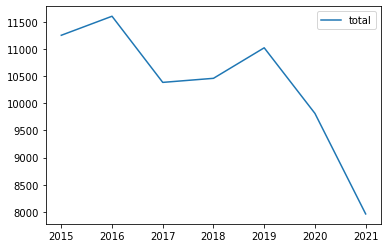

In [46]:
CrimeDF.transpose().plot()

In [124]:
# boolean index 활용하여 서울 지역구의 합계 데이터만 추출 #https://nittaku.tistory.com/111
ForiDF.loc[ForiDF["구분별"] == "합계"]

KeyError: '구분별'

In [ ]:
# 불필요한 row 삭제

ForiDF.drop([0,1,2,3,4,5,6,7], axis=0, inplace=True)


In [ ]:
# 수정 데이터 확인
ForiDF.head(15)

,동별,구분별,항목,단위,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
8,종로구,합계,외국인주민 총괄(동별),NaN,"16,440","11,325","11,908","13,012","14,195","12,610","12,009"
9,종로구,외국인근로자,외국인주민 총괄(동별),NaN,"4,577","1,867","1,479","1,545","1,302","1,157",885
10,종로구,결혼이민자,외국인주민 총괄(동별),NaN,772,584,600,616,613,628,613
11,종로구,유학생,외국인주민 총괄(동별),NaN,"2,727","2,870","3,584","4,293","5,037","4,232","4,240"
12,종로구,외국국적동포,외국인주민 총괄(동별),NaN,"1,871","1,662","1,740","1,636","1,649","1,798","1,683"
13,종로구,기타외국인,외국인주민 총괄(동별),NaN,"5,455","3,366","3,576","3,966","4,558","3,758","3,523"
14,종로구,한국국적을 취득한 자,외국인주민 총괄(동별),NaN,572,552,536,514,518,532,516
15,종로구,외국인주민 자녀(출생),외국인주민 총괄(동별),NaN,466,424,393,442,518,505,549
16,사직동,합계,외국인주민 총괄(동별),NaN,869,509,438,456,472,418,404
17,사직동,외국인근로자,외국인주민 총괄(동별),NaN,128,64,52,46,43,45,40


In [ ]:
# 불필요한 컬럼 삭제

ForiDF.drop(['구분별', '항목', '단위'], axis=1, inplace=True)

In [ ]:
ForiDF.head(15)

,동별,2015 년,2016 년,2017 년,2018 년,2019 년,2020 년,2021 년
8,종로구,"16,440","11,325","11,908","13,012","14,195","12,610","12,009"
9,종로구,"4,577","1,867","1,479","1,545","1,302","1,157",885
10,종로구,772,584,600,616,613,628,613
11,종로구,"2,727","2,870","3,584","4,293","5,037","4,232","4,240"
12,종로구,"1,871","1,662","1,740","1,636","1,649","1,798","1,683"
13,종로구,"5,455","3,366","3,576","3,966","4,558","3,758","3,523"
14,종로구,572,552,536,514,518,532,516
15,종로구,466,424,393,442,518,505,549
16,사직동,869,509,438,456,472,418,404
17,사직동,128,64,52,46,43,45,40
